<a href="https://colab.research.google.com/github/paulosrl/NotebooksGoogleColab/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformação de dados

Código em Python para análise de dados.


Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula



# Inicialização da plataforma

A célula a seguir inicializa a plataforma, carregando as bibliotecas que serão relevantes para o trabalho em seguida.

## Bibliotecas



```numpy``` -- usada para processamento numérico.

```pandas``` -- usada para manipulação de bases de dados.

```pyplot``` -- usada para visualização de dados.

```seaborn``` -- usada para visualização de dados.



In [ ]:
import numpy as np # usada para processamento numérico.
import pandas as pd # usada para manipulação de bases de dados.
import matplotlib.pyplot as plt # usada para visualização de dados.
import seaborn as sns # usada para visualização de dados.

# train_test_split: particionamento da base, em treinamento e teste
from sklearn.model_selection import train_test_split
# preprocessing: para conversão de dados
from sklearn import preprocessing
# LinearRegression: algorimto de regressão linear
from sklearn.linear_model import LinearRegression

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

# Base de dados do Titanic

Essa base de dados pode ser obtida no Kaggle, no endereço:
[www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

### DESCRIÇÃO DOS ATRIBUTOS:


*   ```survival``` --  Sobrevivente (0 = Não; 1 = Sim)
*   ```pclass``` --  Classe do passageiro (1 = 1a classe; 2 = 2a classe; 3 = 3a classe)
*   ```name``` --  Nome (str)
*   ```sex``` --  Sexo (male; female)
*   ```age``` --  Idade (numérica)
*   ```sibsp``` --  Número de irmãos/conjuges à bordo
*   ```parch``` --  Número de pais/filhos à bordo
*   ```ticket``` --  Número da passagem
*   ```fare``` --  Tarifa do passageiro
*   ```cabin``` --  Cabine
*   ```embarked``` --  Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

### UPLOAD DE ARQUIVO LOCAL:

Para fazer o upload de bases de dados, deve-se usar o objeto ```files``` do pacote ```goggle.colab```.

Deve-se fazer o upload do arquivo "train.csv" disponível na pasta "Datasets\Titanic".




In [ ]:
from google.colab import files

uploaded = files.upload()


Saving train.csv to train (1).csv


In [ ]:

titanic_train = pd.read_csv(next(iter(uploaded.keys())))

print("\nDimensões de Titanic:\n{0}\n".format(titanic_train.shape))
print("\nCampos de Titanic:\n{0}\n".format(list(titanic_train.keys())))
print("\nTipos dos dados:\n{0}\n".format(titanic_train.dtypes))

#campos do tipo object normalmente são do tipo string ou caractere.


Dimensões de Titanic:
(891, 12)


Campos de Titanic:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Tipos dos dados:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



### ESTATÍSTICA DESCRITIVA DOS DADOS

O comando describe exibe prioritariamente os campos numéricos. Deve-se isolar os campos categóricos para serem exibidos posteriormente.

In [ ]:
# Exibe apenas os campos numéricos:

print(titanic_train.describe())

# Para se ter uma visão dos atributos categóricos, os atributos não numéricos
# são descartados.

categ = titanic_train.dtypes[titanic_train.dtypes == "object"].index

print("\n", titanic_train[categ].describe(), sep='\n')


       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


                                           Name   Sex    Ticket Cabin Embarked
count                                       891   891       891   204      889
unique                                      891     2       681   147        3
top     Ford, Mrs. Edward (Margaret Ann Watson)  male  CA. 2343    G6        S
freq                                          1   577        

---
**Survived é um campo inteiro que representa: Sobrevivente (0 = Não; 1 = Sim)**

Observar que média 0,38 sobreviventes entre 0 e 1

**pclass - Classe do passageiro (1 = 1a classe; 2 = 2a classe; 3 = 3a classe)**

Observar que média 2,31 é a média de classes dos ticket entre 1 e 3;

Na tabela inferior, são mostrados os campos não numéricos:

Nome: 891 vezes sem repetição

Sex: 991 vezes, com apenas dois valores, sexo mais frequente é male e aparece 5777 vezes

Ticket, possui 681 valores únicos

Cabin, do total de 204 possíveis 147 são únicas

Embarked, possui 3 valores, (C = Cherbourg; Q = Queenstown; S = Southampton), com apenas dois valores faltantes.







Resumo dos dados

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### REMOÇÃO DE ATRIBUTOS IRRELEVANTES

Os atributos ```survival``` (objetivo ou label), e atributos que descrevem os passageiros ou os agrupam em categorias são úteis e serão mantidos, por exemplo: ```Pclass```, ```Sex```, ```Age```, ```SibSp```, ```Parch```, ```Fare``` e ```Embarked```.


* ```passengerId``` é apenas uma chave primária para identificar um passageiro e não é relevante para o problema.

* ```Name``` náo é útil para previsão, mas pode ser útil para identificação dos registros ou pós-processamento (por exemplo, extrair o último nome).

* ```Ticket``` não identifica o registro e nem descreve o passageiro, por isso, deve ser removido.

* ```Cabin``` não identifica bem os passageiros, mas pode ser útil utilizarmos o padrão letra+numero para descrever os passageiros pelo andar do local da cabine.

In [ ]:
del titanic_train["PassengerId"]
del titanic_train["Ticket"]

# Verifique que o número de atributos reduziu para 10.

print("\nDimensões de Titanic:\n{0}\n".format(titanic_train.shape))


Dimensões de Titanic:
(891, 10)



In [ ]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,NaN,S


### TRANSFORMAÇÃO DE VARIÁVEIS

#### Converter numérico em categórico.

Variáveis categóricas codificadas numericamente possuem baixa legibilidade. Portanto, podem ser candidatas a serem recodificadas.

In [ ]:
# OBSERVAÇÃO: se a base for usada para a competição do kaggle, o atributo
# alvo, que é o campo 'survived' não deve ser recodificada.

new_survived = pd.Categorical(titanic_train["Survived"])
new_survived = new_survived.rename_categories(["Morreu","Sobreviveu"])
titanic_train["Survided"] = new_survived

new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered=True)
new_Pclass = new_Pclass.rename_categories(["1aClasse","2aClasse","3aClasse"])
titanic_train["Pclass"] = new_Pclass

print("\nTipos dos dados:\n{0}\n".format(titanic_train.dtypes))
categ = titanic_train.dtypes[titanic_train.dtypes == "category"].index
print("\n", titanic_train[categ].describe(), sep='\n')




Tipos dos dados:
Survived       int64
Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
Survided    category
dtype: object



          Pclass Survided
count        891      891
unique         3        2
top     3aClasse   Morreu
freq         491      549


---
Observa-se que a classe mais frequente é a 3a classe, entre todas as classes;

Observa-se que morrerarm mais passageiros que sobreviveram, o total de mortos foram de 549 passageiros.

In [ ]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survided
0,0,3aClasse,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S,Morreu
1,1,1aClasse,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C85,C,Sobreviveu
2,1,3aClasse,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,NaN,S,Sobreviveu
3,1,1aClasse,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,C123,S,Sobreviveu
4,0,3aClasse,"Allen, Mr. William Henry",male,35.0,0,0,8.05,NaN,S,Morreu


#### Converter atributo através de processamento de string (usando *list comprehension*).

No atributo ```Cabin```,  parece que o padrão letra+número (veja exibição a seguir) indica que uma cabine pertence a algum andar, ou nível. Podemos agrupar o atributo Cabin pela letra inicial da cabine.


In [ ]:
# limpeza dos dados

#Exibe valores únicos

print("\nValores únicos do atributo Cabin:",titanic_train["Cabin"].unique(), sep='\n')

# Converte o dado para String
char_cabin = titanic_train["Cabin"].astype(str)

# Pega apenas a primeira letra

#list comprehension itera pegando parte da string
new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train["Cabin"] = new_cabin

print("\nValores únicos do atributo Cabin:",titanic_train["Cabin"].unique(), sep='\n')


Valores únicos do atributo Cabin:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

Valores

### VALORES OMISSOS OU INCONSISTENTES

Em atributos numéricos , as possibilidades são:

1. substituir por zeros;
2. substituir por um valor médio ou mediano;
3. estimar valores usando modelos estatísticos ou preditivos;
4. particionar a base em registros completos e registros incompletos.

Vamos analisar o atributo ```Age``` para tratarmos os valores omissos.

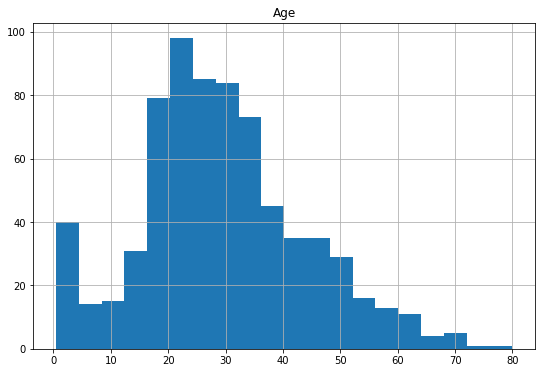

In [ ]:
#histograma
titanic_train.hist(column='Age',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20);         # Numero de colunas do histogram

In [ ]:
#Resumo de Age
print("\nAnálise do novo atributo Age:")
print(titanic_train["Age"].describe())


Análise do novo atributo Age:
count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64


---
**Tratamento do atributo Age**

O dado possui uma distribuição próxima da distribuição Normal. Vamos usar a mediana para preencher os valores faltantes.

In [ ]:
#calcula a mediana usando apenas os elementos presentes no campo idade
mediana = np.median([el for el in titanic_train["Age"] if (np.isnan(el) == False)])

#se a idade for nula, o valor é substitutido pela mediana da idade,
#caso contrário fica a própria idade
new_age = np.where(titanic_train["Age"].isnull(), # condição
                   mediana,                       # valor se verdadeiro
                   titanic_train["Age"])          # valor se falso
titanic_train["Age"] = new_age


Análise do novo atributo Age:
count    891.00
mean      29.36
std       13.02
min        0.42
25%       22.00
50%       28.00
75%       35.00
max       80.00
Name: Age, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d0b5b56d0>]],
      dtype=object)

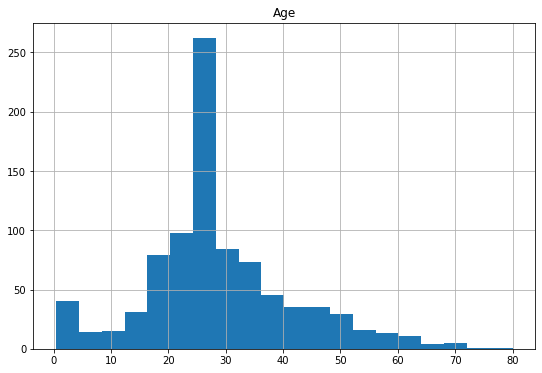

In [ ]:
#histograma
titanic_train.hist(column='Age',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20)         # Numero de colunas do histogram


In [ ]:
#Resumo de Age
print("\nAnálise do novo atributo Age:")
print(titanic_train["Age"].describe())


Análise do novo atributo Age:
count    891.00
mean      29.36
std       13.02
min        0.42
25%       22.00
50%       28.00
75%       35.00
max       80.00
Name: Age, dtype: float64


### DETECTANDO OUTLIERS

Outliers são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de outliers, com valores máximos e mínimo muito distantes; o valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição dos dados.

Registros com valores extremos:
     Survived    Pclass                                Name     Sex   Age  \
258         1  1aClasse                    Ward, Miss. Anna  female  35.0   
679         1  1aClasse  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737         1  1aClasse              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Fare Cabin Embarked    Survided  
258      0      0  512.33     n        C  Sobreviveu  
679      0      1  512.33     B        C  Sobreviveu  
737      0      0  512.33     B        C  Sobreviveu  


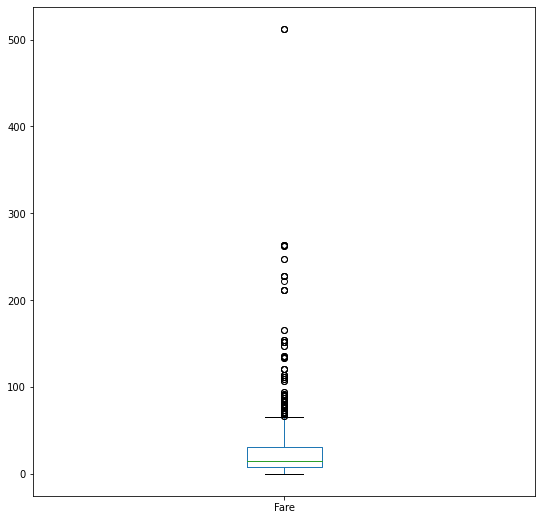

In [ ]:
#iremos analisar outliers em Fare (tarifa).
titanic_train["Fare"].plot(kind="box", figsize=(9,9))

index = np.where(titanic_train["Fare"] == max(titanic_train["Fare"]) )

print("Registros com valores extremos:",titanic_train.loc[index], sep='\n')


### CRIANDO NOVOS ATRIBUTOS

Vamos criar uma nova variável ```Family```, que irá unir, conjude e irmãos (```SibSp```) com pais e filhos (```Parch```).

In [ ]:
#sibsp -- Número de irmãos/conjuges à bordo
#parch -- Número de pais/filhos à bordo

#cria um novo atributo família a partir dos atributos titanic_train["SibSp"] e titanic_train["Parch"]
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

# Encontrando quem tem a maior família À bordo
most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))

print("\nAs maiores famílias à bordo:\n{0}".format(titanic_train.loc[most_family]))
# lista as famílias


As maiores famílias à bordo:
     Survived    Pclass                               Name     Sex   Age  \
159         0  3aClasse         Sage, Master. Thomas Henry    male  28.0   
180         0  3aClasse       Sage, Miss. Constance Gladys  female  28.0   
201         0  3aClasse                Sage, Mr. Frederick    male  28.0   
324         0  3aClasse           Sage, Mr. George John Jr    male  28.0   
792         0  3aClasse            Sage, Miss. Stella Anna  female  28.0   
846         0  3aClasse           Sage, Mr. Douglas Bullen    male  28.0   
863         0  3aClasse  Sage, Miss. Dorothy Edith "Dolly"  female  28.0   

     SibSp  Parch   Fare Cabin Embarked Survided  Family  
159      8      2  69.55     n        S   Morreu      10  
180      8      2  69.55     n        S   Morreu      10  
201      8      2  69.55     n        S   Morreu      10  
324      8      2  69.55     n        S   Morreu      10  
792      8      2  69.55     n        S   Morreu      10  
846    

 Os atributos agora estão redundantes, ou muito correlacionados, como podemos ver com a matriz de correlação. A matriz só funciona com tipos de ddos numéricos. Será possível perceber que a variável ```Family``` terá forte correlação (acima de 0.75) com ```SibSp``` e ```Parch```.

In [ ]:
#matriz de correlação

int_fields = titanic_train.dtypes[titanic_train.dtypes == "int64"].index
corr = np.corrcoef(titanic_train[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)

print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))


Matriz de correlação dos atributos inteiros:
          Survived  SibSp  Parch  Family
Survived      1.00  -0.04   0.08    0.02
SibSp        -0.04   1.00   0.41    0.89
Parch         0.08   0.41   1.00    0.78
Family        0.02   0.89   0.78    1.00
